<a href="https://colab.research.google.com/github/valmyr/AcionamentosEletricos_2025.1/blob/main/AcionamentosTarefa1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
import numpy as np
from matplotlib import pyplot as plt

In [119]:
#SELETOR DE ITEM A=0, B=1 e C qualquer

sel =0

In [120]:
ra=0.06   ;
la=0.0018 ;
ke=0.8    ;
fm=0.01   ;
jm=1.5    ;
re=0.01   ;
le=0.5    ;

fe_non =1;

In [121]:
s1 = (-(ra/la + fm/jm)+np.sqrt((ra/la + fm/jm)**2+4*1*((ra*fm)/(la*jm)*0 - (ke*fe_non)**2)/(la*jm)))/2
s2 = (-(ra/la + fm/jm)-np.sqrt((ra/la + fm/jm)**2+4*1*((ra*fm)/(la*jm)*0 - (ke*fe_non)**2)/(la*jm)))/2

In [122]:
kc = ke

In [123]:
T1 = -1/s1
T2 = -1/s2

Ta = jm/fm
Ka = fm/(ra*la+ke**2*fe_non**2)
Kc =(ke*fe_non)/(ra*la+ke**2*fe_non**2)
Kw = ra/(ra*la+ke**2*fe_non**2)
Tw = la/ra
# ta = 1/

In [124]:
t_inicial = 0
t_final = 5
n_pontos = 10000
h = t_final/n_pontos
t = np.linspace(t_inicial,t_final,n_pontos)
#Variáveis de estados
x1_ia_por_va = np.zeros(n_pontos)
x2_ia_por_va = np.zeros(n_pontos)

x1_ia_por_cm = np.zeros(n_pontos)
x2_ia_por_cm = np.zeros(n_pontos)

x1_wr_por_va = np.zeros(n_pontos)
x2_wr_por_va = np.zeros(n_pontos)

x1_wr_por_cm = np.zeros(n_pontos)
x2_wr_por_cm = np.zeros(n_pontos)
#Entradas
# cm = np.zeros(n_pontos)
cm = np.array([1 if(i>=n_pontos//2) else 0 for i in range(n_pontos)])
if(sel==0):
  va = np.ones(n_pontos)
elif(sel==1):
  va = np.array([1 if(i >= n_pontos//2) else i*(1/(n_pontos//2))for i in range(n_pontos)])
else:
  va = np.sin(2*np.pi*50*t)
#Saídas
ia_va = np.zeros(n_pontos)
ia_cm = np.zeros(n_pontos)
wr_va = np.zeros(n_pontos)
wr_cm = np.zeros(n_pontos)
ia = np.zeros(n_pontos)
wr = np.zeros(n_pontos)

for i in range(n_pontos-1):
  #Contribuição de va em ia:
  x2_ia_por_va[i+1] = x2_ia_por_va[i]+(h/(T1*T2))*(-x1_ia_por_va[i]-(T1+T2)*x2_ia_por_va[i]+Ka*va[i])
  x1_ia_por_va[i+1] = x1_ia_por_va[i]+h*x2_ia_por_va[i]
  ia_va[i+1] =  x1_ia_por_va[i]+Ta*x2_ia_por_va[i]
  #Contribuição de cm em ia:
  x2_ia_por_cm[i+1] = x2_ia_por_cm[i]+(h/(T1*T2))*(-x1_ia_por_cm[i]-(T1+T2)*x2_ia_por_cm[i]+Kc*cm[i])
  x1_ia_por_cm[i+1] = x1_ia_por_cm[i]+h*x2_ia_por_cm[i]
  ia_cm[i+1] = x1_ia_por_cm[i]
  #Contribuição de va em wr:
  x2_wr_por_va[i+1] = x2_wr_por_va[i]+(h/(T1*T2))*(-x1_wr_por_va[i]-(T1+T2)*x2_wr_por_va[i]+Kc*va[i])
  x1_wr_por_va[i+1] = x1_wr_por_va[i]+h*x2_wr_por_va[i]
  wr_va[i+1] = x1_wr_por_va[i]
  #Contribuição de cm em wr:
  x2_wr_por_cm[i+1] = x2_wr_por_cm[i]+(h/(T1*T2))*(-x1_wr_por_cm[i]-(T1+T2)*x2_wr_por_cm[i]-Kw*cm[i])
  x1_wr_por_cm[i+1] = x1_wr_por_cm[i]+h*x2_wr_por_cm[i]
  wr_cm[i] =  x1_wr_por_cm[i]+Tw*x2_wr_por_cm[i]
ia_cm[i+1] = x1_ia_por_cm[i]
ia_va[i+1] = x1_ia_por_va[i]+Ta*x2_ia_por_va[i]
wr_va[i+1] = x1_wr_por_va[i]
wr_cm[i+1] = x1_wr_por_cm[i]+Tw*x2_wr_por_cm[i]
ia = ia_cm+ia_va
wr = wr_cm+wr_va
ea= kc*fe_non*ia

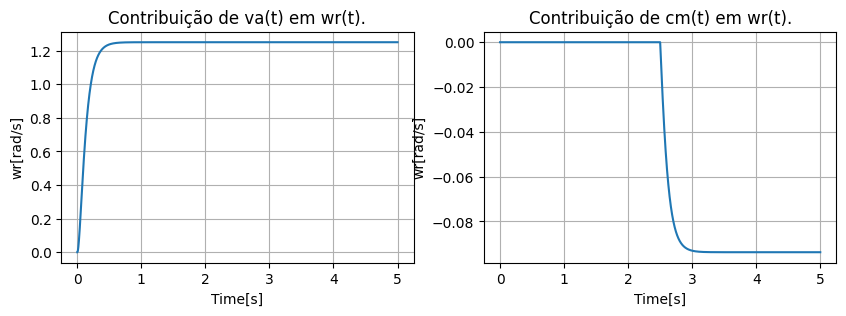

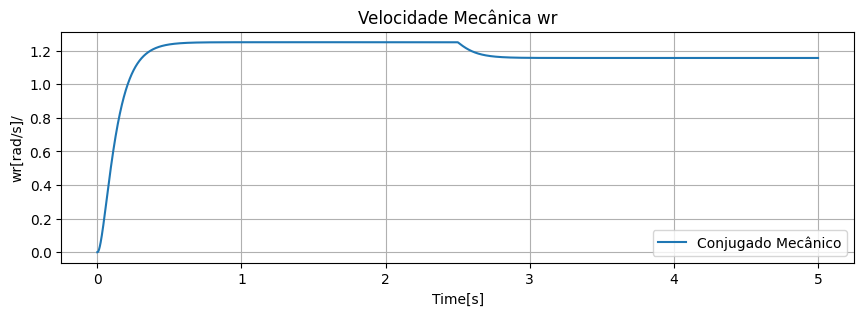

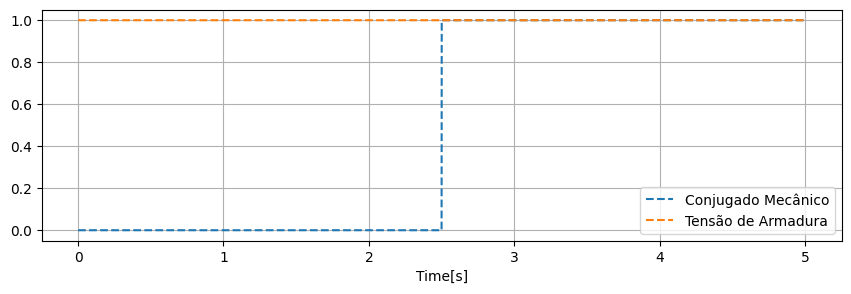

In [125]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.xlabel("Time[s]")
plt.ylabel("wr[rad/s]")
plt.title("Contribuição de va(t) em wr(t).")
plt.grid(True)
plt.plot(t,wr_va)
plt.subplot(1,2,2)
plt.xlabel("Time[s]")
plt.ylabel("wr[rad/s]")
plt.title("Contribuição de cm(t) em wr(t).")
plt.grid(True)
plt.plot(t,wr_cm)
# plt.show()
plt.figure(figsize=(10.23,3))
plt.title('Velocidade Mecânica wr')
plt.xlabel("Time[s]")
plt.ylabel("wr[rad/s]/")
plt.grid(True)
plt.plot(t,wr)
# plt.plot(t,ea)
plt.legend(["Conjugado Mecânico","Conjugado Eletromagnético"])
plt.figure(figsize=(10.32,3))
plt.xlabel("Time[s]")
plt.grid(True)
plt.plot(t,cm,'--')
plt.plot(t,va,'--')
plt.legend(["Conjugado Mecânico","Tensão de Armadura"])
# plt.subplot(1,1,1)
# plt.subplot(4,1,3)
# plt.plot(t,ia_va)
# plt.subplot(4,1,4)
# plt.plot(t,ia_cm)
plt.show()

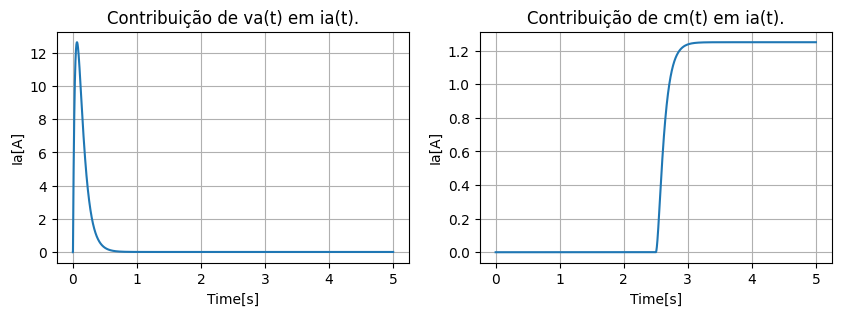

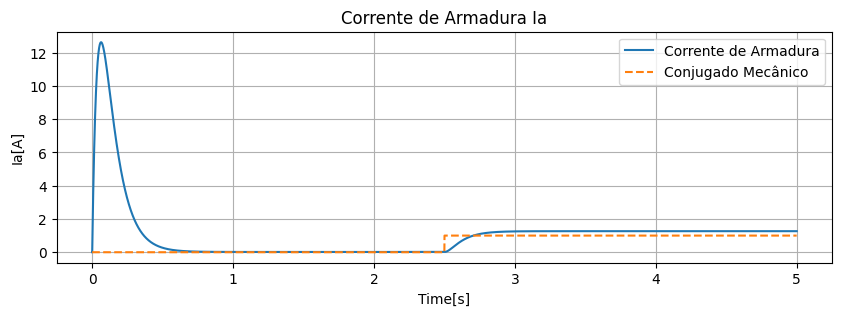

In [126]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.xlabel("Time[s]")
plt.ylabel("Ia[A]")
plt.title("Contribuição de va(t) em ia(t).")
plt.grid(True)
plt.plot(t,ia_va)
plt.subplot(1,2,2)
plt.xlabel("Time[s]")
plt.ylabel("Ia[A]")
plt.title("Contribuição de cm(t) em ia(t).")
plt.grid(True)
plt.plot(t,ia_cm)
# plt.show()
plt.figure(figsize=(10,3))
plt.title('Corrente de Armadura Ia')
plt.xlabel("Time[s]")
plt.ylabel("Ia[A]")
plt.grid(True)
plt.plot(t,ia)
plt.plot(t,cm,'--')
# plt.plot(t,va,'--')
plt.legend(['Corrente de Armadura','Conjugado Mecânico','Tensão de Armadura'])

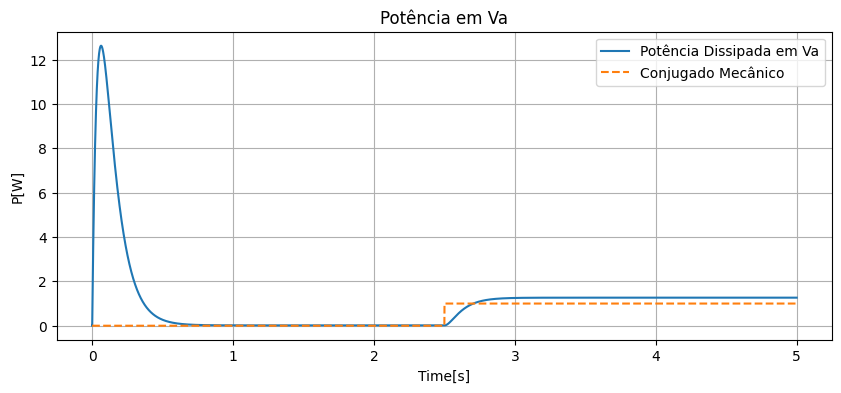

In [127]:
# plt.show()
plt.figure(figsize=(10.,4))
plt.title('Potência em Va')
plt.xlabel("Time[s]")
plt.ylabel("P[W]")
plt.grid(True)
plt.plot(t,va*ia)
plt.plot(t,cm,'--')
# plt.plot(t,va,'--')
plt.legend(['Potência Dissipada em Va','Conjugado Mecânico','Tensão de Armadura'])
plt.show()

#Controle de velocidade P (ação direta na tensão)

10.630365


Text(0.5, 0, 'Tempo[s]')

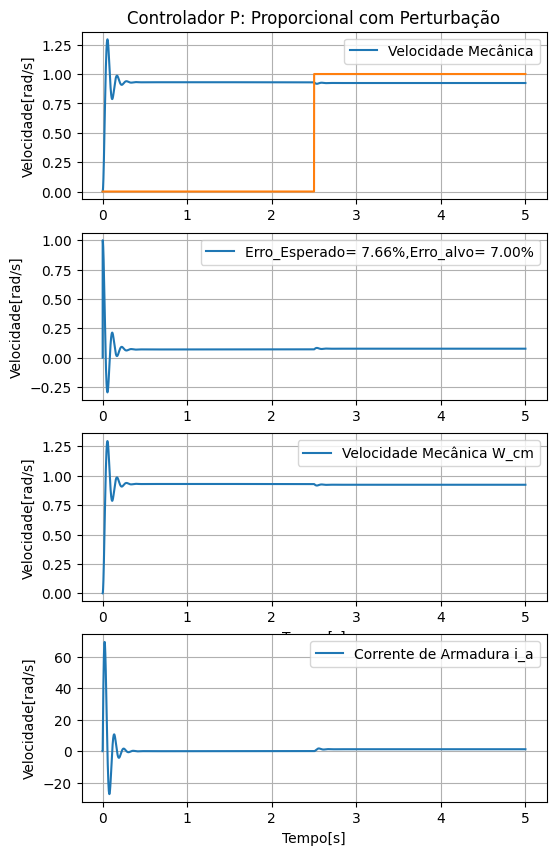

In [128]:
E_tolerado = 7/100
Kp = (1-E_tolerado)/(Kc*E_tolerado)
print(Kp)
t_inicial = 0
t_final = 5
n_pontos = 100000
h = t_final/n_pontos
t = np.linspace(t_inicial,t_final,n_pontos)
#Variáveis de estados
x1_ia_por_va = np.zeros(n_pontos)
x2_ia_por_va = np.zeros(n_pontos)

x1_ia_por_cm = np.zeros(n_pontos)
x2_ia_por_cm = np.zeros(n_pontos)

x1_wr_por_va = np.zeros(n_pontos)
x2_wr_por_va = np.zeros(n_pontos)

x1_wr_por_cm = np.zeros(n_pontos)
x2_wr_por_cm = np.zeros(n_pontos)
#Entradas
# cm = np.zeros1n_pontos)
cm = np.array([1 if(i >=n_pontos//2) else 0 for i in range(n_pontos)])
sel = 0
if(sel==0):
  # va = np.ones(n_pontos)
  wr_ref = np.ones(n_pontos)
elif(sel==1):
  wr_ref= np.array([1 if(i >= n_pontos//2) else i*(1/(n_pontos//2))for i in range(n_pontos)])
  # va= np.array([1 if(i >= n_pontos//2) else i*(1/(n_pontos//2))for i in range(n_pontos)])
else:
  wr_ref = np.sin(2*np.pi*50*t)
  # va = np.sin(2*np.pi*50*t)
#Saídas
ia_va = np.zeros(n_pontos)
ia_cm = np.zeros(n_pontos)
wr_va = np.zeros(n_pontos)
wr_cm = np.zeros(n_pontos)
ia = np.zeros(n_pontos)
wr = np.zeros(n_pontos)
Erro_Wr = np.zeros(n_pontos)

for i in range(n_pontos-1):
  #Contribuição de va em ia:
  va =  (wr_ref[i]-(wr_va[i]+wr_cm[i]))*Kp
  x2_ia_por_va[i+1] = x2_ia_por_va[i]+(h/(T1*T2))*(-x1_ia_por_va[i]-(T1+T2)*x2_ia_por_va[i]+Ka*va)
  x1_ia_por_va[i+1] = x1_ia_por_va[i]+h*x2_ia_por_va[i]
  ia_va[i+1] =  x1_ia_por_va[i]+Ta*x2_ia_por_va[i]
  #Contribuição de cm em ia:
  x2_ia_por_cm[i+1] = x2_ia_por_cm[i]+(h/(T1*T2))*(-x1_ia_por_cm[i]-(T1+T2)*x2_ia_por_cm[i]+Kc*cm[i])
  x1_ia_por_cm[i+1] = x1_ia_por_cm[i]+h*x2_ia_por_cm[i]
  ia_cm[i+1] = x1_ia_por_cm[i+1]
  #Contribuição de va em wr: Simulação com Controlador Proprocional

  Erro_Wr[i+1] = (wr_ref[i]-(wr_va[i]+wr_cm[i]))#Simulação com a Perturbação Cm(t)
  x2_wr_por_va[i+1] = x2_wr_por_va[i]+(h/(T1*T2))*(-x1_wr_por_va[i]-(T1+T2)*x2_wr_por_va[i]+Kc*Kp*Erro_Wr[i+1])
  x1_wr_por_va[i+1] = x1_wr_por_va[i]+h*x2_wr_por_va[i]
  wr_va[i+1]        = x1_wr_por_va[i+1]

  #Contribuição de cm em wr:
  x2_wr_por_cm[i+1] = x2_wr_por_cm[i]+(h/(T1*T2))*(-x1_wr_por_cm[i]-(T1+T2)*x2_wr_por_cm[i]-Kw*cm[i])
  x1_wr_por_cm[i+1] = x1_wr_por_cm[i]+h*x2_wr_por_cm[i]
  wr_cm[i+1] =  x1_wr_por_cm[i]+Tw*x2_wr_por_cm[i]
ia = ia_cm+ia_va
wr = wr_cm+wr_va
# ea= kc*fe_non*ia
plt.figure(figsize=(6,10))
plt.subplot(4,1,1)
plt.grid(True)
plt.plot(t,wr)
plt.plot(t,cm)
# plt.plot(t,va)
plt.title("Controlador P: Proporcional com Perturbação")

plt.legend(["Velocidade Mecânica"])
plt.ylabel("Velocidade[rad/s]")
plt.subplot(4,1,2)
plt.grid(True)
plt.plot(t,Erro_Wr)
plt.legend([f"Erro_Esperado= {100*max(wr_ref[n_pontos-1:]-wr[n_pontos-1:]):.2f}%,Erro_alvo= {E_tolerado*100:.2f}%"])
plt.ylabel("Velocidade[rad/s]")
plt.subplot(4,1,3)
plt.grid(True)
plt.plot(t,wr)
plt.legend(["Velocidade Mecânica W_cm"])
plt.ylabel("Velocidade[rad/s]")
plt.xlabel("Tempo[s]")
plt.subplot(4,1,4)
plt.grid(True)
plt.plot(t,ia)
plt.legend(["Corrente de Armadura i_a"])
plt.ylabel("Velocidade[rad/s]")
plt.xlabel("Tempo[s]")


#Controle de velocidade PI (ação direta na tensão)

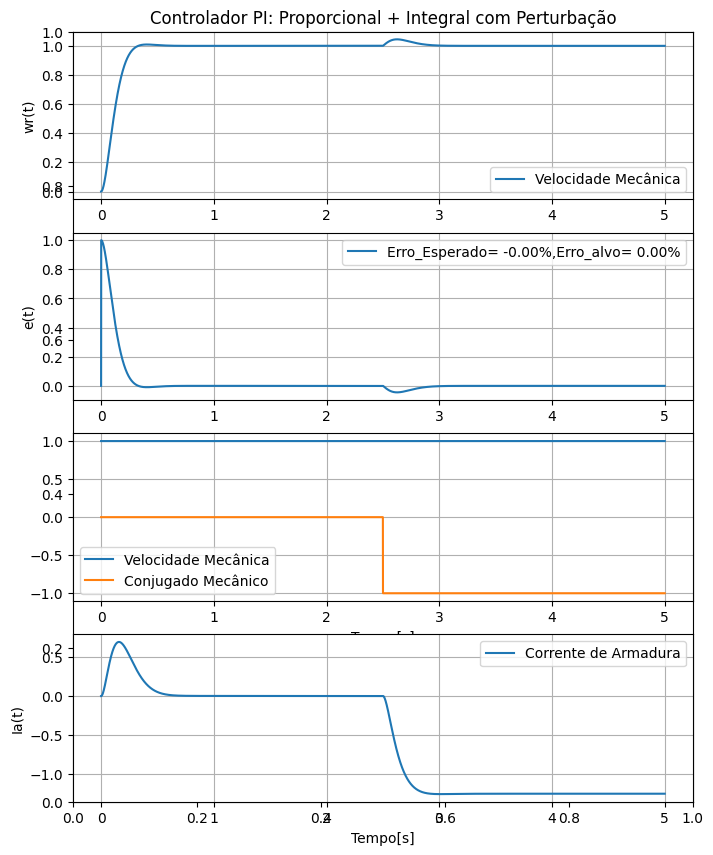

In [135]:
E_tolerado = 0
Ki = 1/(4*(la/ra)*Kc)
Kp = Ki*T1
t_inicial = 0
t_final = 5
n_pontos = 10000
h = t_final/n_pontos
t = np.linspace(t_inicial,t_final,n_pontos)
#Variáveis de estados
x1_ia_por_va = np.zeros(n_pontos)
x2_ia_por_va = np.zeros(n_pontos)

x1_ia_por_cm = np.zeros(n_pontos)
x2_ia_por_cm = np.zeros(n_pontos)

x1_wr_por_va = np.zeros(n_pontos)
x2_wr_por_va = np.zeros(n_pontos)

x1_wr_por_cm = np.zeros(n_pontos)
x2_wr_por_cm = np.zeros(n_pontos)
#Entradas
# cm = np.zeros(n_pontos)
cm = np.array([-1 if(i >=n_pontos//2) else 0 for i in range(n_pontos)])
sel = 0
if(sel==0):
  wr_ref = np.ones(n_pontos)
elif(sel==1):
  wr_ref= np.array([1 if(i >= n_pontos//2) else i*(1/(n_pontos//2))for i in range(n_pontos)])
  va= np.array([1 if(i >= n_pontos//2) else i*(1/(n_pontos//2))for i in range(n_pontos)])
else:
  wr_ref = np.sin(2*np.pi*50*t)
  va = np.sin(2*np.pi*50*t)
dva = np.zeros(n_pontos)
va = np.zeros(n_pontos)
#Saídas
ia_va = np.zeros(n_pontos)
ia_cm = np.zeros(n_pontos)
wr_va = np.zeros(n_pontos)
wr_cm = np.zeros(n_pontos)
ia = np.zeros(n_pontos)
wr = np.zeros(n_pontos)
Erro_Wr = np.zeros(n_pontos)
# va = E(Kp+Ki/s) ; va = e(t)*Kp+integral e(t)
for i in range(n_pontos-1):
  # Cálculo de va(t)
  dva[i+1] =  dva[i]+h*(wr_ref[i]-(wr_va[i]+wr_cm[i]))
  va[i] = Kp*dva[i]+Ki*va[i]

  #Contribuição de va em ia:
  x2_ia_por_va[i+1] = x2_ia_por_va[i]+(h/(T1*T2))*(-x1_ia_por_va[i]-(T1+T2)*x2_ia_por_va[i]+Ka*va[i])
  x1_ia_por_va[i+1] = x1_ia_por_va[i]+h*x2_ia_por_va[i]
  ia_va[i+1] =  x1_ia_por_va[i]+Ta*x2_ia_por_va[i]
  #Contribuição de cm em ia:
  x2_ia_por_cm[i+1] = x2_ia_por_cm[i]+(h/(T1*T2))*(-x1_ia_por_cm[i]-(T1+T2)*x2_ia_por_cm[i]+Kc*cm[i])
  x1_ia_por_cm[i+1] = x1_ia_por_cm[i]+h*x2_ia_por_cm[i]
  ia_cm[i+1] = x1_ia_por_cm[i+1]
  #Contribuição de va em wr: Simulação com Controlador Proprocional + Integral

  Erro_Wr[i+1]      = (wr_ref[i]-(wr_va[i]+wr_cm[i]))#Simulação com a Perturbação Cm(t)
  x2_wr_por_va[i+1] = x2_wr_por_va[i]+(h/(T2))*(-x2_wr_por_va[i]+Kc*Ki*Erro_Wr[i+1])
  x1_wr_por_va[i+1] = x1_wr_por_va[i]+h*x2_wr_por_va[i]
  wr_va[i+1]        = x1_wr_por_va[i+1]

  #Contribuição de cm em wr:
  x2_wr_por_cm[i+1] = x2_wr_por_cm[i]+(h/(T1*T2))*(-x1_wr_por_cm[i]-(T1+T2)*x2_wr_por_cm[i]-Kw*cm[i])
  x1_wr_por_cm[i+1] = x1_wr_por_cm[i]+h*x2_wr_por_cm[i]
  wr_cm[i+1] =  x1_wr_por_cm[i]+Tw*x2_wr_por_cm[i]
ia = ia_cm+ia_va
wr = wr_cm+wr_va
# ea= kc*fe_non*ia
plt.figure(figsize=(8,10))
plt.title("Controlador PI: Proporcional + Integral com Perturbação")
plt.subplot(4,1,1)
plt.grid(True)
plt.plot(t,wr)
plt.legend(["Velocidade Mecânica"])
plt.ylabel("wr(t)")
plt.subplot(4,1,2)
plt.grid(True)
plt.plot(t,Erro_Wr)
plt.legend([f"Erro_Esperado= {100*max(wr_ref[n_pontos-1:]-wr[n_pontos-1:]):.2f}%,Erro_alvo= {E_tolerado*100:.2f}%"])
plt.ylabel("e(t)")
plt.subplot(4,1,3)
plt.grid(True)
plt.plot(t,wr_ref)
plt.plot(t,cm)
plt.legend(["Velocidade Mecânica","Conjugado Mecânico"])
plt.xlabel("Tempo[s]")
plt.subplot(4,1,4)
plt.plot(t,ia)
plt.legend(["Corrente de Armadura"])
plt.ylabel("Ia(t)")
plt.xlabel("Tempo[s]")
plt.grid(True)
plt.show()

#Controle de velocidade PID (ação direta na tensão)

In [130]:
va[::-1]

array([ 0.00000000e+00, -5.20430117e-16, -5.23022905e-16, ...,
        3.24342136e-04,  3.24357720e-04,  3.24357720e-04])

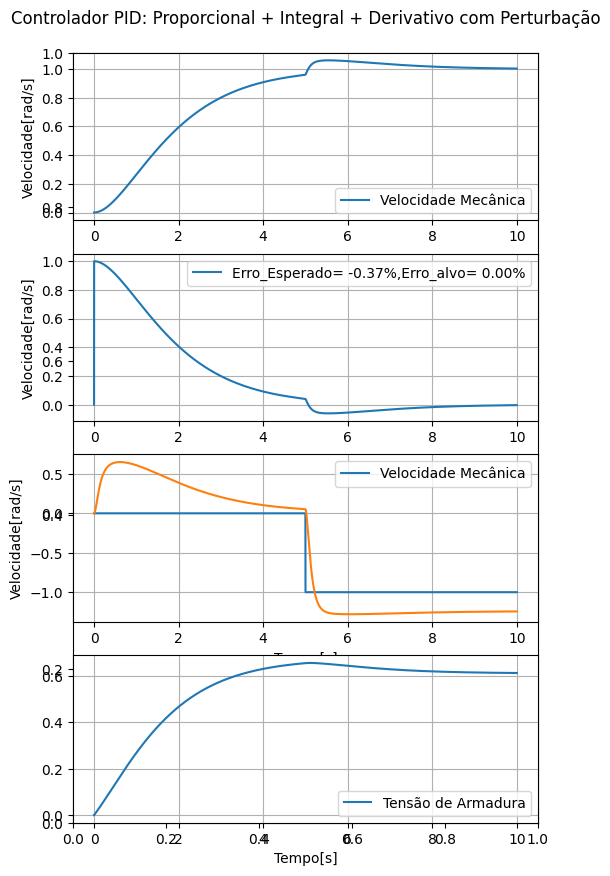

In [131]:
E_tolerado = 0
sf =-1
Td = -1/(2*sf)
Ki = 1/(4*Kc*Td)
Kp = (T1+T2-Td)*Ki
Kd = (T1*T2-(T1+T2-Td))*Ki

t_inicial = 0
t_final = 10
n_pontos = 10000
h = t_final/n_pontos
t = np.linspace(t_inicial,t_final,n_pontos)
#Variáveis de estados
x1_ia_por_va = np.zeros(n_pontos)
x2_ia_por_va = np.zeros(n_pontos)

x1_ia_por_cm = np.zeros(n_pontos)
x2_ia_por_cm = np.zeros(n_pontos)

x1_wr_por_va = np.zeros(n_pontos)
x2_wr_por_va = np.zeros(n_pontos)

x1_wr_por_cm = np.zeros(n_pontos)
x2_wr_por_cm = np.zeros(n_pontos)
#Entradas
# cm = np.zeros(n_pontos)
cm = np.array([-1 if(i >=n_pontos//2) else 0 for i in range(n_pontos)])
sel = 0
if(sel==0):
  wr_ref = np.ones(n_pontos)
elif(sel==1):
  wr_ref= np.array([1 if(i >= n_pontos//2) else i*(1/(n_pontos//2))for i in range(n_pontos)])
else:
  wr_ref = np.sin(2*np.pi*50*t)

dva = np.zeros(n_pontos)
d2va = np.zeros(n_pontos)
va = np.zeros(n_pontos)
#Saídas
ia_va = np.zeros(n_pontos)
ia_cm = np.zeros(n_pontos)
wr_va = np.zeros(n_pontos)
wr_cm = np.zeros(n_pontos)
ia = np.zeros(n_pontos)
wr = np.zeros(n_pontos)
Erro_Wr = np.zeros(n_pontos)

for i in range(n_pontos-1):
  dva[i+1] = dva[i]+h*d2va[i]
  d2va[i+1] = d2va[i]+(h/Td)*((wr_ref[i]-(wr_va[i]+wr_cm[i]))-d2va[i])
  va[i+1] = d2va[i]*(Td*Kp+Kd) +(Kp+Ki*Td+Kd)*dva[i] + Ki*va[i]
  #Contribuição de va em ia:
  x2_ia_por_va[i+1] = x2_ia_por_va[i]+(h/(T1*T2))*(-x1_ia_por_va[i]-(T1+T2)*x2_ia_por_va[i]+Ka*va[i+1])
  x1_ia_por_va[i+1] = x1_ia_por_va[i]+h*x2_ia_por_va[i]
  ia_va[i+1] =  x1_ia_por_va[i]+Ta*x2_ia_por_va[i]
  #Contribuição de cm em ia:
  x2_ia_por_cm[i+1] = x2_ia_por_cm[i]+(h/(T1*T2))*(-x1_ia_por_cm[i]-(T1+T2)*x2_ia_por_cm[i]+Kc*cm[i])
  x1_ia_por_cm[i+1] = x1_ia_por_cm[i]+h*x2_ia_por_cm[i]
  ia_cm[i+1] = x1_ia_por_cm[i+1]
  #Contribuição de va em wr: Simulação com Controlador Proprocional + Integral

  Erro_Wr[i+1]      = (wr_ref[i]-(wr_va[i]+wr_cm[i]))#Simulação com a Perturbação Cm(t)
  x2_wr_por_va[i+1] = x2_wr_por_va[i]+(h/(Td))*(-x2_wr_por_va[i]+Kc*Ki*Erro_Wr[i+1])
  x1_wr_por_va[i+1] = x1_wr_por_va[i]+h*x2_wr_por_va[i]
  wr_va[i+1]        = x1_wr_por_va[i+1]

  #Contribuição de cm em wr:
  x2_wr_por_cm[i+1] = x2_wr_por_cm[i]+(h/(T1*T2))*(-x1_wr_por_cm[i]-(T1+T2)*x2_wr_por_cm[i]-Kw*cm[i])
  x1_wr_por_cm[i+1] = x1_wr_por_cm[i]+h*x2_wr_por_cm[i]
  wr_cm[i+1] =  x1_wr_por_cm[i]+Tw*x2_wr_por_cm[i]
ia = ia_cm+ia_va
wr = wr_cm+wr_va
# ea= kc*fe_non*ia
plt.figure(figsize=(6,10))
plt.title("Controlador PID: Proporcional + Integral + Derivativo com Perturbação\n")
plt.subplot(4,1,1)
plt.grid(True)
plt.plot(t,wr)
plt.legend(["Velocidade Mecânica"])
plt.ylabel("Velocidade[rad/s]")
plt.subplot(4,1,2)
plt.grid(True)
plt.plot(t,Erro_Wr)
plt.legend([f"Erro_Esperado= {100*max(wr_ref[n_pontos-1:]-wr[n_pontos-1:]):.2f}%,Erro_alvo= {E_tolerado*100:.2f}%"])
plt.ylabel("Velocidade[rad/s]")
plt.subplot(4,1,3)
plt.grid(True)
plt.plot(t,cm)
# plt.plot(t,wr_cm)
plt.plot(t,ia)
# plt.plot(t,cm)
plt.legend(["Velocidade Mecânica"])
plt.ylabel("Velocidade[rad/s]")
plt.xlabel("Tempo[s]")
plt.subplot(4,1,4)
plt.plot(t,va)
plt.xlabel("Tempo[s]")
plt.legend(["Tensão de Armadura"])
plt.grid(True)
plt.show()
